選擇這個資料集的原因是此為課程的延伸，可以在上課內容基礎之下進行適當的調整，發現資料變異性的同時以快速的方式修正，我認為這是練習基本功重要的特點，此份資料是用來預測transported的true、false，sample呈現其實transported全部都是false，想知道按照自己過往所學的內容可以獲得多少的準確度呢？也期望在探索過程可以學習一些新技巧，尤其是資料修正、填補的部分，到底怎樣填補會形成最佳預測值，希望這份資料能帶給我上述的結論。

載入模組

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

載入資料集


In [6]:
df = pd.read_csv("train.csv")
df.head

<bound method NDFrame.head of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  Fo

觀察資料集
#遺漏值處理、格式轉換
#扔掉欄位，發現name cabin destination留著後面無法轉換格式，因此先行處理掉
#視覺化觀察，可自由換變數比較，等會先尋找數值類的

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5

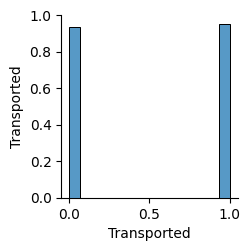

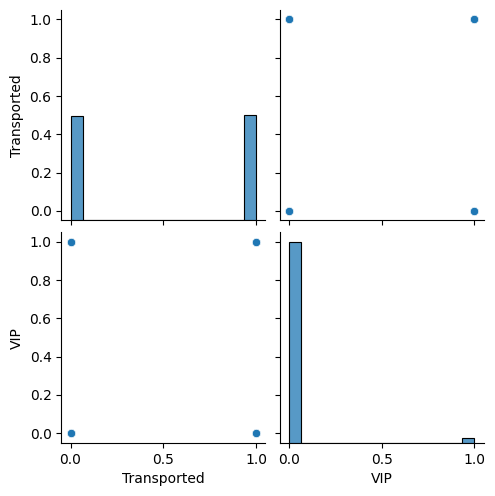

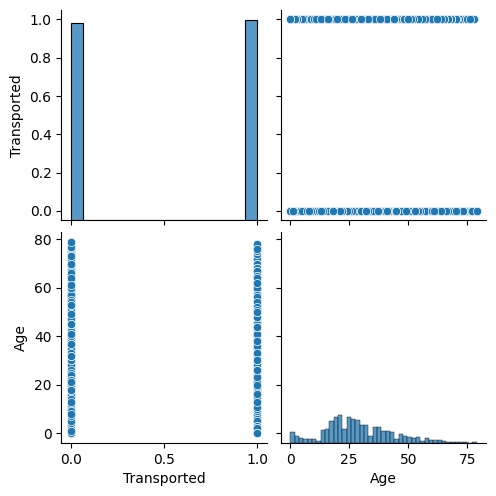

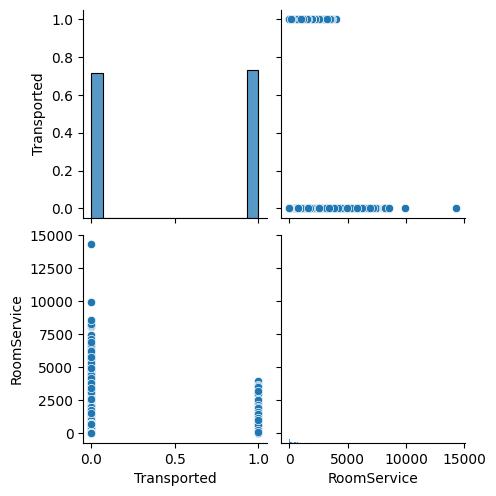

In [7]:
df.drop(['Name','Cabin','Destination'], axis=1, inplace=True)

sns.pairplot(df[['Transported', 'HomePlanet']], dropna=True)

sns.pairplot(df[['Transported', 'VIP']], dropna=True)

sns.pairplot(df[['Transported', 'Age']], dropna=True)

sns.pairplot(df[['Transported', 'RoomService']], dropna=True)

以下用Transported來分組 得到數值化平均值

In [8]:
df.groupby('Transported').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,389.266066,382.615930,167.566217,564.382666,543.629822
True,27.748834,63.098021,532.691984,179.829972,61.675531,69.148131


各欄位分布狀況累計，可得數據龐大，8000多筆資料

In [19]:
df['HomePlanet'].value_counts()


Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [20]:
df['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [21]:
df['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [22]:
df['RoomService'].value_counts()

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64

處理資料
#isnull是跑空值(缺失)與否的true or false
#缺失超過一半的欄位就丟掉，發現大家缺少的資料以全部來說占比都不算多，欄位中最多缺失整體的0.025，也沒人空值超過一半，因此都嘗試填補

In [23]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [24]:
len(df)/2

4346.5

In [25]:
df.isnull().sum() > (len(df)/2)

PassengerId     False
HomePlanet      False
CryoSleep       False
Age             False
VIP             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Transported     False
dtype: bool

#先算到底各欄位有多少筆，此處不全部挑選，再分組比較是否有機會以中位數填補？數值型資料缺失填補使用中位數，發現要先解決非數值型資料，於是下一步先以idmax去填補。

In [27]:
df['Age'].isnull().value_counts()

False    8514
True      179
Name: Age, dtype: int64

In [28]:
df['HomePlanet'].isnull().value_counts()

False    8492
True      201
Name: HomePlanet, dtype: int64

In [29]:
df['CryoSleep'].isnull().value_counts()


False    8476
True      217
Name: CryoSleep, dtype: int64

In [30]:
df['RoomService'].isnull().value_counts()


False    8512
True      181
Name: RoomService, dtype: int64

In [31]:
df['VIP'].isnull().value_counts()


False    8490
True      203
Name: VIP, dtype: int64

以下進行分組比較，尋找是否有機會中位數填補，發現有些欄位間的關係由於欄位屬性不太一樣，似乎也沒甚麼好比較的，等下直接以另一種方式填補。

<AxesSubplot:xlabel='Transported'>

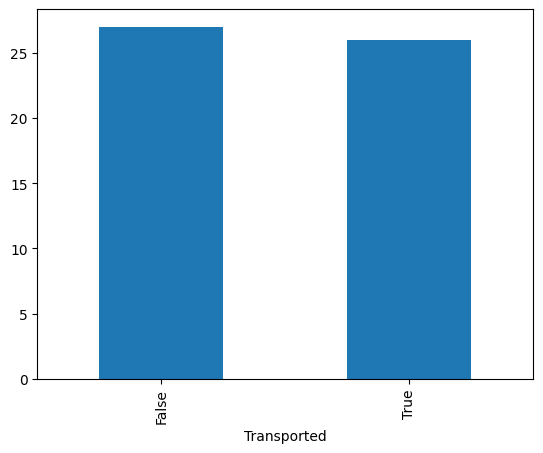

In [32]:
df.groupby('Transported')['Age'].median().plot(kind='bar')


<AxesSubplot:xlabel='Transported'>

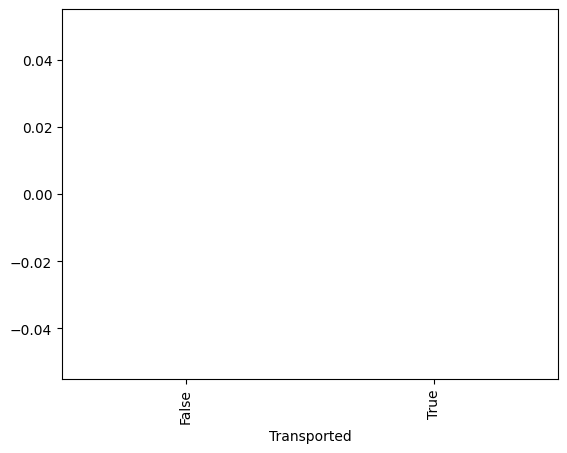

In [33]:
df.groupby('Transported')['FoodCourt'].median().plot(kind='bar')


<AxesSubplot:xlabel='Transported'>

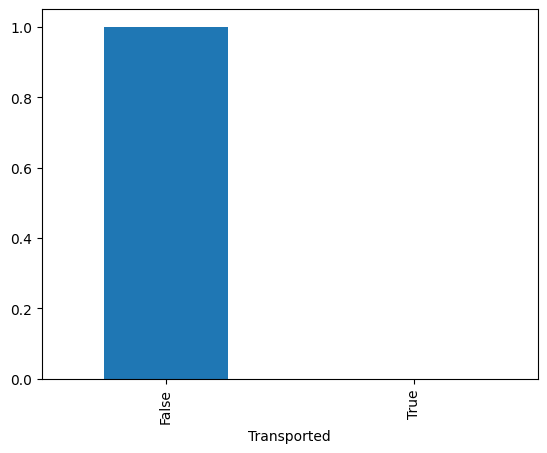

In [34]:
df.groupby('Transported')['RoomService'].median().plot(kind='bar')


<AxesSubplot:xlabel='Transported'>

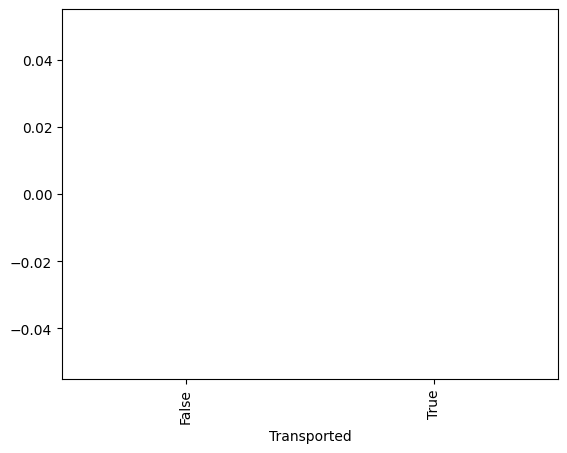

In [35]:
df.groupby('Transported')['FoodCourt'].median().plot(kind='bar')


<AxesSubplot:xlabel='Transported'>

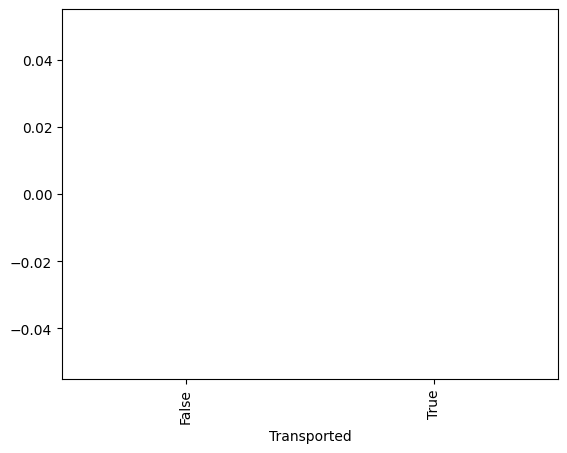

In [36]:
df.groupby('Transported')['ShoppingMall'].median().plot(kind='bar')



In [38]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

idxmax指得到id目的地最大值，以這些資料來說是取得他們的眾數，我個人覺得這樣準確性比較高，後面也可以將唯一的純數值型資料age應用在中位數填補的部分，也是我暫時唯一想到的辦法。

In [39]:
df['HomePlanet'].value_counts().idxmax()

'Earth'

In [40]:
df['HomePlanet'].fillna(df['HomePlanet'].value_counts().idxmax(),inplace = True )



In [41]:
df['CryoSleep'].value_counts().idxmax()


False

In [42]:
df['CryoSleep'].fillna(df['CryoSleep'].value_counts().idxmax(),inplace = True )



In [43]:
df['VIP'].value_counts().idxmax()


False

In [44]:
df['VIP'].fillna(df['VIP'].value_counts().idxmax(),inplace = True )



In [45]:
df['Age'].value_counts().idxmax()


24.0

In [46]:
df['Age'].fillna(df['Age'].value_counts().idxmax(),inplace = True )

以下數值型資料以先前用眾數填補完畢的數值型資料age去以中位數填補，然後就會得到資料都沒有空值了。

In [47]:
df['RoomService'] = df.groupby('Age')['RoomService'].apply(lambda x: x.fillna(x.median()))

In [48]:
df['FoodCourt'] = df.groupby('Age')['FoodCourt'].apply(lambda x: x.fillna(x.median()))


In [49]:
df['ShoppingMall'] = df.groupby('Age')['ShoppingMall'].apply(lambda x: x.fillna(x.median()))


In [50]:
df['Spa'] = df.groupby('Age')['Spa'].apply(lambda x: x.fillna(x.median()))


In [51]:
df['VRDeck'] = df.groupby('Age')['VRDeck'].apply(lambda x: x.fillna(x.median()))


In [52]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

getdummies指欄位值變化類型小的，選取欄位值變化小的來比較，把結果變純粹的數值。

In [53]:
df = pd.get_dummies(data=df, columns=['VIP', 'HomePlanet'])

In [54]:
df.head

<bound method NDFrame.head of      PassengerId  CryoSleep   Age  RoomService  FoodCourt  ShoppingMall  \
0        0001_01      False  39.0          0.0        0.0           0.0   
1        0002_01      False  24.0        109.0        9.0          25.0   
2        0003_01      False  58.0         43.0     3576.0           0.0   
3        0003_02      False  33.0          0.0     1283.0         371.0   
4        0004_01      False  16.0        303.0       70.0         151.0   
...          ...        ...   ...          ...        ...           ...   
8688     9276_01      False  41.0          0.0     6819.0           0.0   
8689     9278_01       True  18.0          0.0        0.0           0.0   
8690     9279_01      False  26.0          0.0        0.0        1872.0   
8691     9280_01      False  32.0          0.0     1049.0           0.0   
8692     9280_02      False  44.0        126.0     4688.0           0.0   

         Spa  VRDeck  Transported  VIP_False  VIP_True  HomePlanet_Ea

In [55]:
df.drop('VIP_True', axis=1, inplace=True)

In [56]:
df.head

<bound method NDFrame.head of      PassengerId  CryoSleep   Age  RoomService  FoodCourt  ShoppingMall  \
0        0001_01      False  39.0          0.0        0.0           0.0   
1        0002_01      False  24.0        109.0        9.0          25.0   
2        0003_01      False  58.0         43.0     3576.0           0.0   
3        0003_02      False  33.0          0.0     1283.0         371.0   
4        0004_01      False  16.0        303.0       70.0         151.0   
...          ...        ...   ...          ...        ...           ...   
8688     9276_01      False  41.0          0.0     6819.0           0.0   
8689     9278_01       True  18.0          0.0        0.0           0.0   
8690     9279_01      False  26.0          0.0        0.0        1872.0   
8691     9280_01      False  32.0          0.0     1049.0           0.0   
8692     9280_02      False  44.0        126.0     4688.0           0.0   

         Spa  VRDeck  Transported  VIP_False  HomePlanet_Earth  \
0  

info可得目前都是沒空值狀態。

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        8693 non-null   object 
 1   CryoSleep          8693 non-null   bool   
 2   Age                8693 non-null   float64
 3   RoomService        8693 non-null   float64
 4   FoodCourt          8693 non-null   float64
 5   ShoppingMall       8693 non-null   float64
 6   Spa                8693 non-null   float64
 7   VRDeck             8693 non-null   float64
 8   Transported        8693 non-null   bool   
 9   VIP_False          8693 non-null   uint8  
 10  HomePlanet_Earth   8693 non-null   uint8  
 11  HomePlanet_Europa  8693 non-null   uint8  
 12  HomePlanet_Mars    8693 non-null   uint8  
dtypes: bool(2), float64(6), object(1), uint8(4)
memory usage: 526.5+ KB


corr把table旋轉方向

In [58]:
df.corr()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,VIP_False,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
CryoSleep,1.000000,-0.072235,-0.244017,-0.206081,-0.207797,-0.198294,-0.192721,0.460132,0.078281,-0.107231,0.093395,0.032715
Age,-0.072235,1.000000,0.069078,0.129427,0.033620,0.120694,0.099583,-0.074153,-0.092271,-0.200187,0.217005,0.015410
RoomService,-0.244017,0.069078,1.000000,-0.015294,0.052322,0.009227,-0.018638,-0.241072,-0.056558,-0.140544,-0.066666,0.245330
FoodCourt,-0.206081,0.129427,-0.015294,1.000000,-0.013744,0.223218,0.224085,0.044829,-0.125189,-0.214099,0.364114,-0.124887
ShoppingMall,-0.207797,0.033620,0.052322,-0.013744,1.000000,0.014538,-0.007849,0.009392,-0.018412,-0.071912,-0.021154,0.111654
Spa,-0.198294,0.120694,0.009227,0.223218,0.014538,1.000000,0.147656,-0.218536,-0.061064,-0.159135,0.266125,-0.087995
VRDeck,-0.192721,0.099583,-0.018638,0.224085,-0.007849,0.147656,1.000000,-0.204873,-0.123061,-0.154064,0.282556,-0.111863
Transported,0.460132,-0.074153,-0.241072,0.044829,0.009392,-0.218536,-0.204873,1.000000,0.037261,-0.168845,0.176916,0.019544
VIP_False,0.078281,-0.092271,-0.056558,-0.125189,-0.018412,-0.061064,-0.123061,0.037261,1.000000,0.162345,-0.147008,-0.043523
HomePlanet_Earth,-0.107231,-0.200187,-0.140544,-0.214099,-0.071912,-0.159135,-0.154064,-0.168845,0.162345,1.000000,-0.633221,-0.559658


然後在x軸暫處理掉transported，因為我們需要他在y軸。

In [59]:
x = df.drop(['Transported', 'CryoSleep'], axis = 1)

In [60]:
y = df['Transported']

以下是建立形成prediction的過程。

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=67)

In [63]:
from sklearn.linear_model import LogisticRegression

最大迭代次數設定

In [64]:
lr = LogisticRegression(max_iter=200)

In [65]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=200)

最開始丟掉三個欄位的原因便是出在lr會跑不出來因此刪掉，

In [66]:
predictions = lr.predict(x_test)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

y軸的準確度預測，三方面整體表現來說大概就是7成5準確度

In [68]:
accuracy_score(y_test, predictions)

0.781058282208589

In [69]:
recall_score(y_test, predictions)

0.8986280487804879

In [70]:
precision_score(y_test,predictions)

0.7291280148423006

形成預測表

In [71]:
pd.DataFrame(confusion_matrix(y_test, predictions), columns=['Predict not Transported','Predict Transported'], index=['True not Transported', 'True Transported'])

,Predict not Transported,Predict Transported
True not Transported,858,438
True Transported,133,1179


In [72]:
import joblib

最後pkl輸出成一個檔案。

In [73]:
joblib.dump(lr, 'Titanic-Spaceship-20230417.pkl' ,compress=3)

['Titanic-Spaceship-20230417.pkl']

以下是submission檔，首先輸入模組以及讀取檔案

In [74]:
import joblib

In [75]:
model_pretrained = joblib.load('Titanic-Spaceship-20230417.pkl')

In [76]:
import pandas as pd

In [77]:
df_test = pd.read_csv("test.csv")

以下操作和joshua檔一樣，drop掉cabin、destination、name

In [78]:
df_test.drop(['Name','Destination'], axis=1, inplace=True)

In [79]:
df_test.drop('Cabin', axis=1, inplace=True)


發現各項資料空值很多，因此要和在joshua檔一樣的動作填補

In [80]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Age           4186 non-null   float64
 4   VIP           4184 non-null   object 
 5   RoomService   4195 non-null   float64
 6   FoodCourt     4171 non-null   float64
 7   ShoppingMall  4179 non-null   float64
 8   Spa           4176 non-null   float64
 9   VRDeck        4197 non-null   float64
dtypes: float64(6), object(4)
memory usage: 334.3+ KB


以下是非純數值型資料先用眾數填補法，同joshua檔操作，便不細說明。

In [81]:
df_test['HomePlanet'].value_counts().idxmax()

'Earth'

In [82]:
df_test['HomePlanet'].fillna(df_test['HomePlanet'].value_counts().idxmax(),inplace = True )

In [83]:
df_test['CryoSleep'].value_counts().idxmax()

False

In [84]:
df_test['CryoSleep'].fillna(df_test['CryoSleep'].value_counts().idxmax(),inplace = True )

In [85]:
df_test['VIP'].value_counts().idxmax()

False

In [86]:
df_test['VIP'].fillna(df_test['VIP'].value_counts().idxmax(),inplace = True )

In [87]:
df_test['Age'].value_counts().idxmax()

18.0

In [88]:
df_test['Age'].fillna(df_test['Age'].value_counts().idxmax(),inplace = True )

以下用關聯式比較，中位數填補。

In [89]:
df_test['RoomService'] = df_test.groupby('Age')['RoomService'].apply(lambda x: x.fillna(x.median()))

In [90]:
df_test['FoodCourt'] = df_test.groupby('Age')['FoodCourt'].apply(lambda x: x.fillna(x.median()))

In [91]:
df_test['ShoppingMall'] = df_test.groupby('Age')['ShoppingMall'].apply(lambda x: x.fillna(x.median()))

In [92]:
df_test['Spa'] = df_test.groupby('Age')['Spa'].apply(lambda x: x.fillna(x.median()))

In [93]:
df_test['VRDeck'] = df_test.groupby('Age')['VRDeck'].apply(lambda x: x.fillna(x.median()))

最後再跑一次測總值，發現已無空值，資訊上也全部呈現非空值。

In [94]:
df_test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [95]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   bool   
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
dtypes: bool(2), float64(6), object(2)
memory usage: 275.8+ KB


以下找分類少的欄目做columns，轉換VIP為純數值資料呈現。

In [96]:
df_test = pd.get_dummies(data=df_test, columns=['VIP', 'HomePlanet'])

In [97]:
df_test.drop('VIP_True', axis=1, inplace=True)

In [98]:
df_test.drop('CryoSleep', axis=1, inplace=True)

載入預測模型

In [99]:
predictions2 = model_pretrained.predict(df_test)

In [100]:
predictions2 

array([ True, False,  True, ...,  True,  True,  True])

In [101]:
forSubmissionDF = pd.DataFrame(columns=['PassengerId', 'Transported'])

In [102]:
forSubmissionDF

,PassengerId,Transported


此處有稍作調整，由於Id非不是單純的1.2.3，而是有特殊符號，所以不以range，改用read讀取的方式。

In [103]:
forSubmissionDF['PassengerId'] =  pd.read_csv('test.csv')['PassengerId']

In [104]:
forSubmissionDF['Transported'] = predictions2

In [105]:
forSubmissionDF.to_csv('for_submission_carat.csv', index=False)

此份資料是用來預測transported的true、false，sample呈現其實transported全部都是false，按照自己過往所學的內容可以獲得的準確度我覺得頗為滿意了，因為這是初次接觸預測的模型，雖然不可能達到極高標準，但在其中也有探索一些簡單方便的小技巧，像是資料修正、填補的部分，還有跟同學一起討論填補方式及可行性，如何填補會形成最佳預測值？討論過程很有趣也很新鮮，相信未來這個知識可以確實應用在商業操作或經濟預測上，當然還需要學得很深入才行，總結來說是個cp值很高的一個大規模數據預測方式，最後謝謝老師不厭其煩的解答我的疑惑，由衷感激您。